## <center> Import Libs

In [118]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams["figure.figsize"] = (13, 8)
plt.rcParams["font.size"] = 14

import seaborn as sns
# Customizing seaborn color palette
sns.light_palette("seagreen", as_cmap=True)
sns.set(style="darkgrid")

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures, StandardScaler

import warnings 
warnings.filterwarnings('ignore')

## <center> Import Data

In [119]:
data = pd.read_csv('data/sales.csv')
data.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


## <center> Data Info

In [120]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [121]:
data.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


## <center> Null data / Duplicates

In [122]:
data.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

In [123]:
data.duplicated().sum()

0

## <center> Univariate Analysis

<AxesSubplot:xlabel='TV', ylabel='Density'>

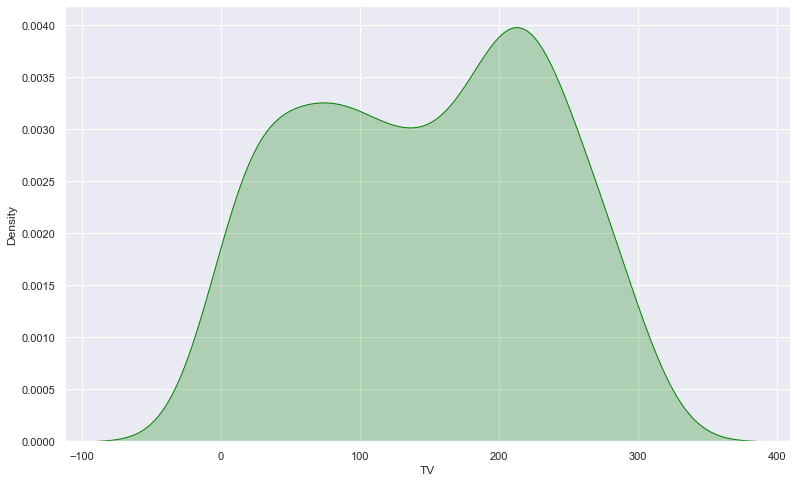

In [124]:
sns.kdeplot(
    data['TV'],
    color='green',
    fill=True,
    shade=True,
    legend='TV'
)

<AxesSubplot:xlabel='Radio', ylabel='Density'>

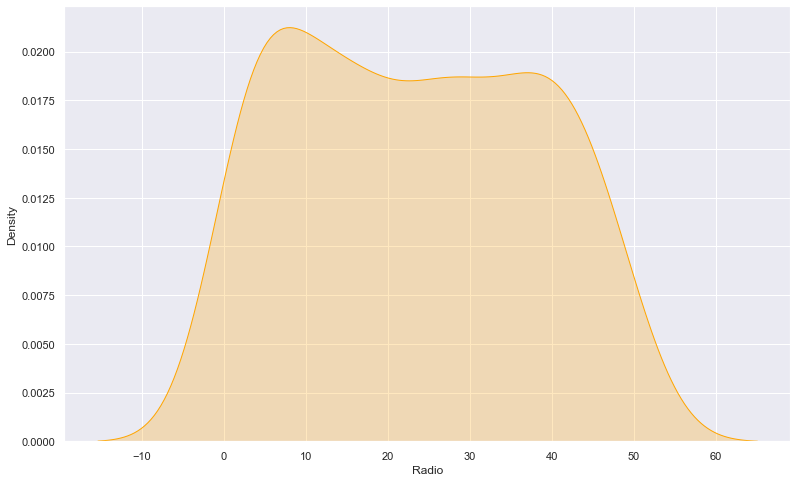

In [125]:
sns.kdeplot(
    data['Radio'],
    color='orange',
    fill=True,
    shade=True,
    legend='Radio'
)

<AxesSubplot:xlabel='Newspaper', ylabel='Density'>

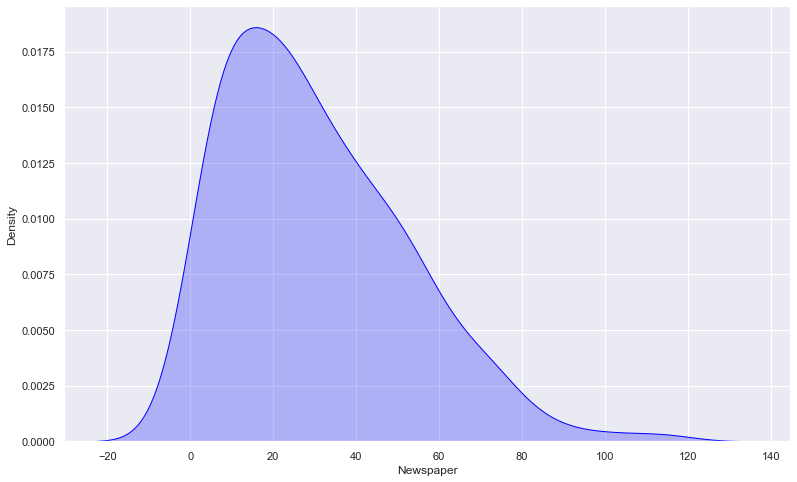

In [126]:
sns.kdeplot(
    data['Newspaper'],
    color='blue',
    fill=True,
    shade=True,
    legend='Newspaper'
)

## <center> Multivariate Analysis

<AxesSubplot:>

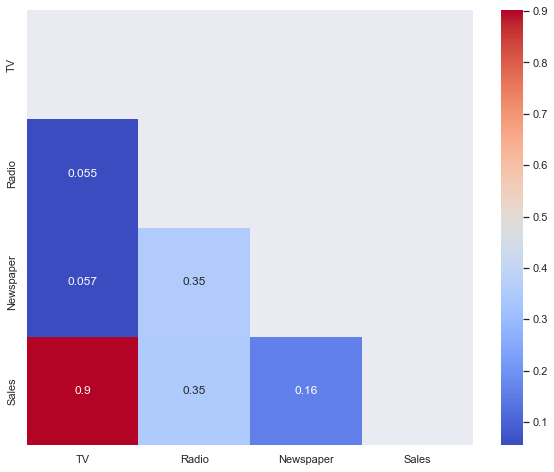

In [127]:
plt.figure(figsize=(10,8))
mask = np.triu(np.ones_like(data.corr()))
sns.heatmap(
    data.corr(), 
    mask=mask, 
    cmap='coolwarm', 
    annot = True
)

As we can see, there is a big correlation between TV feature and Sales

<AxesSubplot:xlabel='TV', ylabel='Sales'>

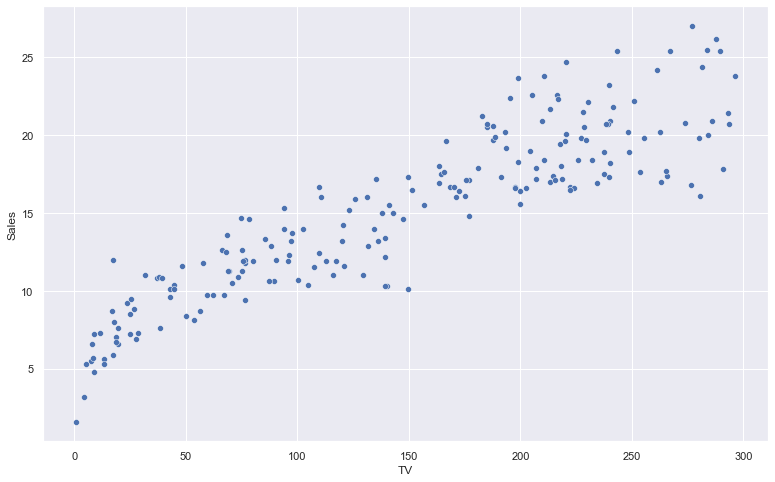

In [128]:
sns.scatterplot(
    x = data['TV'],
    y = data['Sales']
)

## <center> Dividing data into X and y

In [129]:
X = data.iloc[:,:-1]
y = data['Sales']

print(f"X data shape: {X.shape}")
print(f"y data shape: {y.shape}")

X data shape: (200, 3)
y data shape: (200,)


## <center> Data Scaling

In [130]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

## <center> Dividing into train and test data

In [131]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, random_state = 1, test_size = .1)

print(f"X_train data shape: {X_train.shape}")
print(f"X_test data shape: {X_test.shape}")
print(f"y_train data shape: {y_train.shape}")
print(f"y_test data shape: {y_test.shape}")

X_train data shape: (180, 3)
X_test data shape: (20, 3)
y_train data shape: (180,)
y_test data shape: (20,)


## <center> Modeling

In [132]:
poly = PolynomialFeatures(degree=3)

X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

model = LinearRegression()
model.fit(X_train_poly, y_train)
print(f"Model score: {model.score(X_test_poly, y_test)}")

Model score: 0.9197053579460626
